In [1]:
!python -m pip install tweepy 

In [2]:
!python -m pip install textblob

In [3]:
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to C:\Users\Sushmita
[nltk_data]     Swain\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Sushmita
[nltk_data]     Swain\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Sushmita
[nltk_data]     Swain\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sushmita Swain\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to C:\Users\Sushmita
[nltk_data]     Swain\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to C:\Users\Sushmita
[nltk_data]     Swain\AppData\Roaming\nltk_data...
[nlt

In [4]:
import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 
  
class TwitterClient(object): 
    ''' 
    Generic Twitter Class for sentiment analysis. 
    '''
    def __init__(self): 
        ''' 
        Class constructor or initialization method. 
        '''
        # keys and tokens from the Twitter Dev Console 
        consumer_key = 'bYfhXuthzv0EOJkmXZmGfZ3dl'
        consumer_secret = 'Dw5a9vJWpFsZzWUVTLKrpWk09BPIh3vUYHZxoif0C93IW6EJaG'
        access_token = '1221614283835858945-oIncNxhQmhcnm2avooFKhLSioHLyHK'
        access_token_secret = 'VpYHWynGjytnZgwUlbaF0hjw3QlyjwxaThyeIT50ssetN'
  
        # attempt authentication 
        try: 
            # create OAuthHandler object 
            self.auth = OAuthHandler(consumer_key, consumer_secret) 
            # set access token and secret 
            self.auth.set_access_token(access_token, access_token_secret) 
            # create tweepy API object to fetch tweets 
            self.api = tweepy.API(self.auth) 
        except: 
            print("Error: Authentication Failed") 
  
    def clean_tweet(self, tweet): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+) | ('^https?:\/\/.*[\r\n]*')", " ", tweet).split()) 
  
    def get_tweet_sentiment(self, tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(self.clean_tweet(tweet)) 
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'
  
    def get_tweets(self, query, count=3000): 
        ''' 
        Main function to fetch tweets and parse them. 
        '''
        # empty list to store parsed tweets 
        tweets = [] 
  
        try: 
            # call twitter api to fetch tweets 
            fetched_tweets = self.api.search(q=query, count=count) 
  
            # parsing tweets one by one 
            for tweet in fetched_tweets: 
                # empty dictionary to store required params of a tweet 
                parsed_tweet = {} 
  
                # saving text of tweet 
                parsed_tweet['text'] = tweet.text 
                # saving sentiment of tweet 
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text) 
  
                # appending parsed tweet to tweets list 
                if tweet.retweet_count > 0: 
                    # if tweet has retweets, ensure that it is appended only once 
                    if parsed_tweet not in tweets: 
                        tweets.append(parsed_tweet) 
                else: 
                    tweets.append(parsed_tweet) 
  
            # return parsed tweets 
            return tweets 
  
        except tweepy.TweepError as e: 
            # print error (if any) 
            print("Error : " + str(e)) 

In [5]:
# creating object of TwitterClient Class 
api = TwitterClient() 
# calling function to get tweets 
tweets = api.get_tweets(query = 'Amazon India') 

# picking positive tweets from tweets 
ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 
# percentage of positive tweets 
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets))) 
# picking negative tweets from tweets 
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
# percentage of negative tweets 
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))

neuttweets = [tweet for tweet in tweets if tweet['sentiment'] == 'neutral'] 
# percentage of neutral tweets 
print("Neutral tweets percentage: {} %".format(100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets)))

print("\n\ntweets:")
for tweet in tweets[:5]: 
    print(tweet)

# printing first 5 positive tweets 
print("\n\nPositive tweets:") 
for tweet in ptweets[:10]: 
    print(tweet['text']) 

# printing first 5 negative tweets 
print("\n\nNegative tweets:") 
for tweet in ntweets[:10]: 
    print(tweet['text']) 

print("\n\nNeutral tweets:") 
for tweet in neuttweets[:10]: 
    print(tweet['text']) 
    
print(len(tweets), len(ntweets), len(ptweets), len(neuttweets))

Positive tweets percentage: 23.4375 %
Negative tweets percentage: 20.3125 %
Neutral tweets percentage: 56.25 %


tweets:
{'text': 'RT @ARanganathan72: Delighted to announce the publication by @BloomsburyIndia of the revised edition of The Rat Eater, a novel co-authored…', 'sentiment': 'positive'}
{'text': 'RT @sudesna_ghosh: Free on #amazonprime 🇮🇳\n\nFree on #KindleUnlimited 🌏\n\nhumor✔️\ndrama✔️\nromance✔️\n\nINDIA: https://t.co/SRs9L9LEAJ\n\nUSA: htt…', 'sentiment': 'positive'}
{'text': 'RT @ProviPressMedia: #Exclusive_Buzz :\n\nThere is an huge competition between #Amazon_Prime &amp; #Netflix_India To Get The Premiere Rights of…', 'sentiment': 'positive'}
{'text': '@JeffBezos We have been selling in Indian marketplaces for 5 years, we wanted to sell in Amazon India and signed up… https://t.co/jKlUwUkkTI', 'sentiment': 'neutral'}
{'text': "RT @GabrielConstans: THE LAST CONCEPTION #film showing in US &amp; Canada!\n\n🌈 The Sikand family's only hope of continuing their “ancient bloodl

In [6]:
import pandas as pd

txt = []
sentiment = []
for tweet in tweets:
    txt.append(tweet['text'])
    sentiment.append(tweet['sentiment'])

df = pd.DataFrame(list(zip(txt, sentiment)), columns=['tweet_txt', 'tweet_sentiment'])
df

,tweet_txt,tweet_sentiment
0,RT @ARanganathan72: Delighted to announce the ...,positive
1,RT @sudesna_ghosh: Free on #amazonprime 🇮🇳\n\n...,positive
2,RT @ProviPressMedia: #Exclusive_Buzz :\n\nTher...,positive
3,@JeffBezos We have been selling in Indian mark...,neutral
4,RT @GabrielConstans: THE LAST CONCEPTION #film...,neutral
...,...,...
59,@AbundanceFlavor @cosyblogclub @GoldenBloggerz...,neutral
60,RT @against_FDI: What’s happening @amazonIN @A...,neutral
61,@AmazonHelp in Covid times. It’s happened to m...,neutral
62,@AmazonHelp I have replied TWICE and there has...,neutral


In [7]:
flipkart_tweets = api.get_tweets(query = 'Flipkart')

fk_txt = []
fk_sentiment = []
for tweet in flipkart_tweets:
    fk_txt.append(tweet['text'])
    fk_sentiment.append(tweet['sentiment'])

df1 = pd.DataFrame(list(zip(fk_txt, fk_sentiment)), columns=['tweet_txt', 'tweet_sentiment'])
df1

,tweet_txt,tweet_sentiment
0,#Flipkart ने आर्थिक फायदे के लिए भगवान श्री गण...,neutral
1,RT @HinduJagrutiOrg: .@Flipkart ने आर्थिक फायद...,neutral
2,You order and they cancel. Now they are asking...,positive
3,@flipkart_tech,neutral
4,@Flipkart,neutral
...,...,...
86,@_sujayshekhar @Flipkart @flipkartsupport @Fli...,negative
87,@Flipkart no one came for Schedule pickup. voi...,neutral
88,Again I have to wait 15 days for a single item...,negative
89,I had ordered one item through Flipkart on 9th...,positive


In [8]:
snapdeal_tweets = api.get_tweets(query = 'Snapdeal')

sd_txt = []
sd_sentiment = []
for tweet in snapdeal_tweets:
    fk_txt.append(tweet['text'])
    fk_sentiment.append(tweet['sentiment'])

df2 = pd.DataFrame(list(zip(sd_txt, sd_sentiment)), columns=['tweet_txt', 'tweet_sentiment'])
df2

,tweet_txt,tweet_sentiment


In [9]:
data = pd.concat([df, df1, df2]).reset_index(drop=True)
data

,tweet_txt,tweet_sentiment
0,RT @ARanganathan72: Delighted to announce the ...,positive
1,RT @sudesna_ghosh: Free on #amazonprime 🇮🇳\n\n...,positive
2,RT @ProviPressMedia: #Exclusive_Buzz :\n\nTher...,positive
3,@JeffBezos We have been selling in Indian mark...,neutral
4,RT @GabrielConstans: THE LAST CONCEPTION #film...,neutral
...,...,...
150,@_sujayshekhar @Flipkart @flipkartsupport @Fli...,negative
151,@Flipkart no one came for Schedule pickup. voi...,neutral
152,Again I have to wait 15 days for a single item...,negative
153,I had ordered one item through Flipkart on 9th...,positive


In [12]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Sushmita
[nltk_data]    |     Swain\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to C:\Users\Sushmita
[nltk_data]    |     Swain\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\Sushmita
[nltk_data]    |     Swain\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to C:\Users\Sushmita
[nltk_data]    |     Swain\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to C:\Users\Sushmita
[nltk_data]    |     Swain\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown_tei.zip.
[nltk_data]    | Downloading package cess_cat 

True

In [13]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

# lower the tweets
data['preprocessed_tweet_txt'] = data['tweet_txt'].str.lower()

# filter out stop words and URLs
en_stop_words = set(stopwords.words('english'))
extended_stop_words = en_stop_words | \
                    {
                        '&amp;', 'rt',                           
                        'th','co', 're', 've', 'kim', 'daca'
                    }
url_re = '(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})'        
data['preprocessed_tweet_txt'] = data['preprocessed_tweet_txt'].apply(lambda row: ' '.join([word for word in row.split() if (not word in extended_stop_words) and (not re.match(url_re, word))]))

# tokenize the tweets
tokenizer = RegexpTokenizer('[a-zA-Z]\w+\'?\w*')
data['tokenized_tweet_txt'] = data['preprocessed_tweet_txt'].apply(lambda row: tokenizer.tokenize(row))
    

data

,tweet_txt,tweet_sentiment,preprocessed_tweet_txt,tokenized_tweet_txt
0,RT @ARanganathan72: Delighted to announce the ...,positive,@aranganathan72: delighted announce publicatio...,"[aranganathan72, delighted, announce, publicat..."
1,RT @sudesna_ghosh: Free on #amazonprime 🇮🇳\n\n...,positive,@sudesna_ghosh: free #amazonprime 🇮🇳 free #kin...,"[sudesna_ghosh, free, amazonprime, free, kindl..."
2,RT @ProviPressMedia: #Exclusive_Buzz :\n\nTher...,positive,@provipressmedia: #exclusive_buzz : huge compe...,"[provipressmedia, exclusive_buzz, huge, compet..."
3,@JeffBezos We have been selling in Indian mark...,neutral,@jeffbezos selling indian marketplaces 5 years...,"[jeffbezos, selling, indian, marketplaces, yea..."
4,RT @GabrielConstans: THE LAST CONCEPTION #film...,neutral,@gabrielconstans: last conception #film showin...,"[gabrielconstans, last, conception, film, show..."
...,...,...,...,...
150,@_sujayshekhar @Flipkart @flipkartsupport @Fli...,negative,@_sujayshekhar @flipkart @flipkartsupport @fli...,"[sujayshekhar, flipkart, flipkartsupport, flip..."
151,@Flipkart no one came for Schedule pickup. voi...,neutral,@flipkart one came schedule pickup. voice supp...,"[flipkart, one, came, schedule, pickup, voice,..."
152,Again I have to wait 15 days for a single item...,negative,wait 15 days single item. thay also suppose te...,"[wait, days, single, item, thay, also, suppose..."
153,I had ordered one item through Flipkart on 9th...,positive,ordered one item flipkart 9th august-2020 orde...,"[ordered, one, item, flipkart, th, august, ord..."


Bag of Words

In [14]:
from sklearn.feature_extraction.text import CountVectorizer


# get most frequent words and their counts
def get_most_freq_words(str, n=None):
    vect = CountVectorizer().fit(str)
    bag_of_words = vect.transform(str)
    sum_words = bag_of_words.sum(axis=0) 
    freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
    freq =sorted(freq, key = lambda x: x[1], reverse=True)
    return freq[:n]
  
get_most_freq_words([ word for tweet in data.tokenized_tweet_txt for word in tweet],10)

[('flipkart', 92),
 ('amazon', 38),
 ('india', 34),
 ('hindujagrutiorg', 22),
 ('flipkartsupport', 15),
 ('order', 14),
 ('amazonin', 11),
 ('book', 10),
 ('th', 8),
 ('buy', 7)]

Finding the Number of Topics

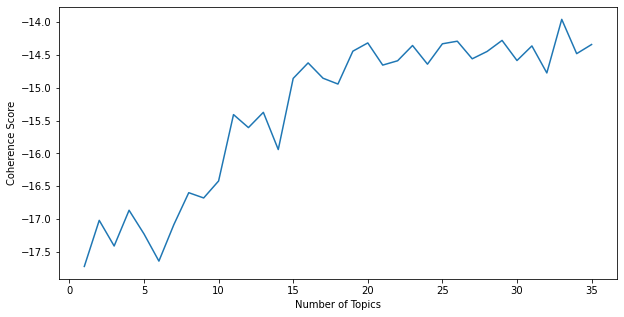

In [16]:
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
%matplotlib inline

# build a dictionary where for each tweet, each word has its own id.
# We have 6882 tweets and 10893 words in the dictionary.
tweets_dictionary = Dictionary(data.tokenized_tweet_txt)

# build the corpus i.e. vectors with the number of occurence of each word per tweet
tweets_corpus = [tweets_dictionary.doc2bow(tweet) for tweet in data.tokenized_tweet_txt]

# compute coherence
tweets_coherence = []
for nb_topics in range(1,36):
    lda = LdaModel(tweets_corpus, num_topics = nb_topics, id2word = tweets_dictionary, passes=10)
    cohm = CoherenceModel(model=lda, corpus=tweets_corpus, dictionary=tweets_dictionary, coherence='u_mass')
    coh = cohm.get_coherence()
    tweets_coherence.append(coh)

# visualize coherence
plt.figure(figsize=(10,5))
plt.plot(range(1,36),tweets_coherence)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.show()

# Running LDA

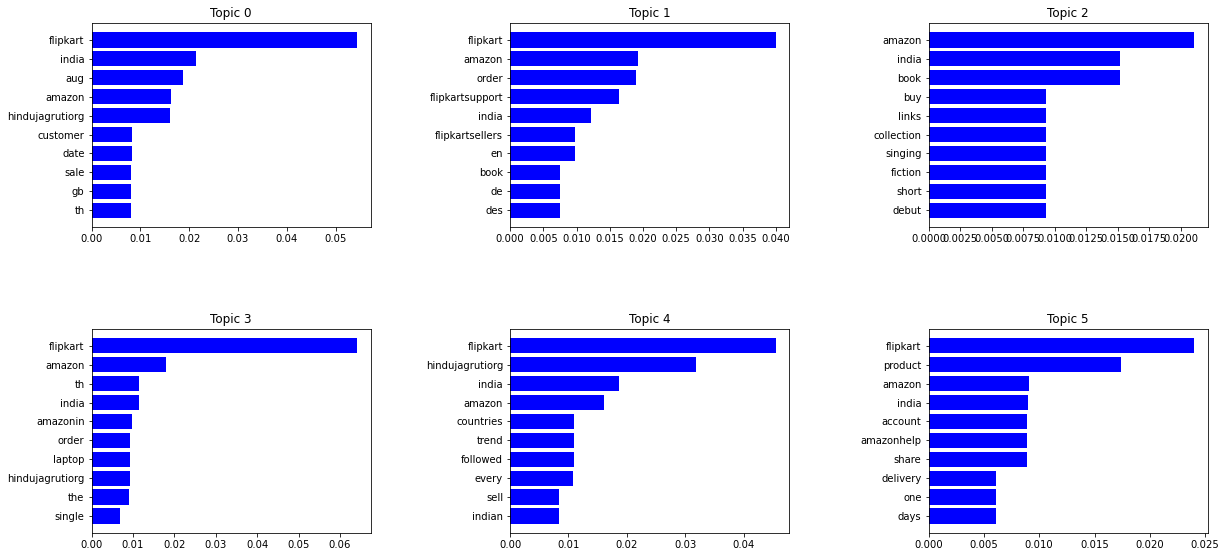

In [17]:
import matplotlib.gridspec as gridspec
import math


k = 6
tweets_lda = LdaModel(tweets_corpus, num_topics = k, id2word = tweets_dictionary, passes=10)

def plot_top_words(lda=tweets_lda, nb_topics=k, nb_words=10):
    top_words = [[word for word,_ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
    top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

    gs  = gridspec.GridSpec(round(math.sqrt(k))+1,round(math.sqrt(k))+1)
    gs.update(wspace=0.5, hspace=0.5)
    plt.figure(figsize=(20,15))
    for i in range(nb_topics):
        ax = plt.subplot(gs[i])
        plt.barh(range(nb_words), top_betas[i][:nb_words], align='center',color='blue', ecolor='black')
        ax.invert_yaxis()
        ax.set_yticks(range(nb_words))
        ax.set_yticklabels(top_words[i][:nb_words])
        plt.title("Topic "+str(i))
        
  
plot_top_words()

# Word-Cloud

In [18]:
wd_corpus = []
for i in data.tokenized_tweet_txt:
    tmp = ' '.join(x for x in set(i))
    wd_corpus.append(tmp)

print(wd_corpus)

['bloomsburyindia eater novel rat revised publication aranganathan72 delighted authored edition announce co', 'drama usa india free romance htt humor sudesna_ghosh amazonprime kindleunlimited', 'amazon_prime of competition exclusive_buzz get provipressmedia rights premiere huge netflix_india', 'selling marketplaces years amazon sell jeffbezos india signed up wanted indian', "family's ancient sikand conception film gabrielconstans showing last hope continuing bloodl canada us", 'languages participate singing amp different still contest letswatcho may emotion same voiceyourfreedom', 'amazon vouchers carefree singing win contest wor sing letswatcho showcase freedom talent voiceyourfreedom', 'amazon jeffbezos check business practic against_fdi amazonin amitagarwal unethical responsible', 'opindia_com unsubtledesi congratulations modifiedvikas number rahulroushan book opindiadelhiriotsreport already be', 'amazon opindia_com kindle bestseller violence genesis traces opindiadelhiriotsreport r

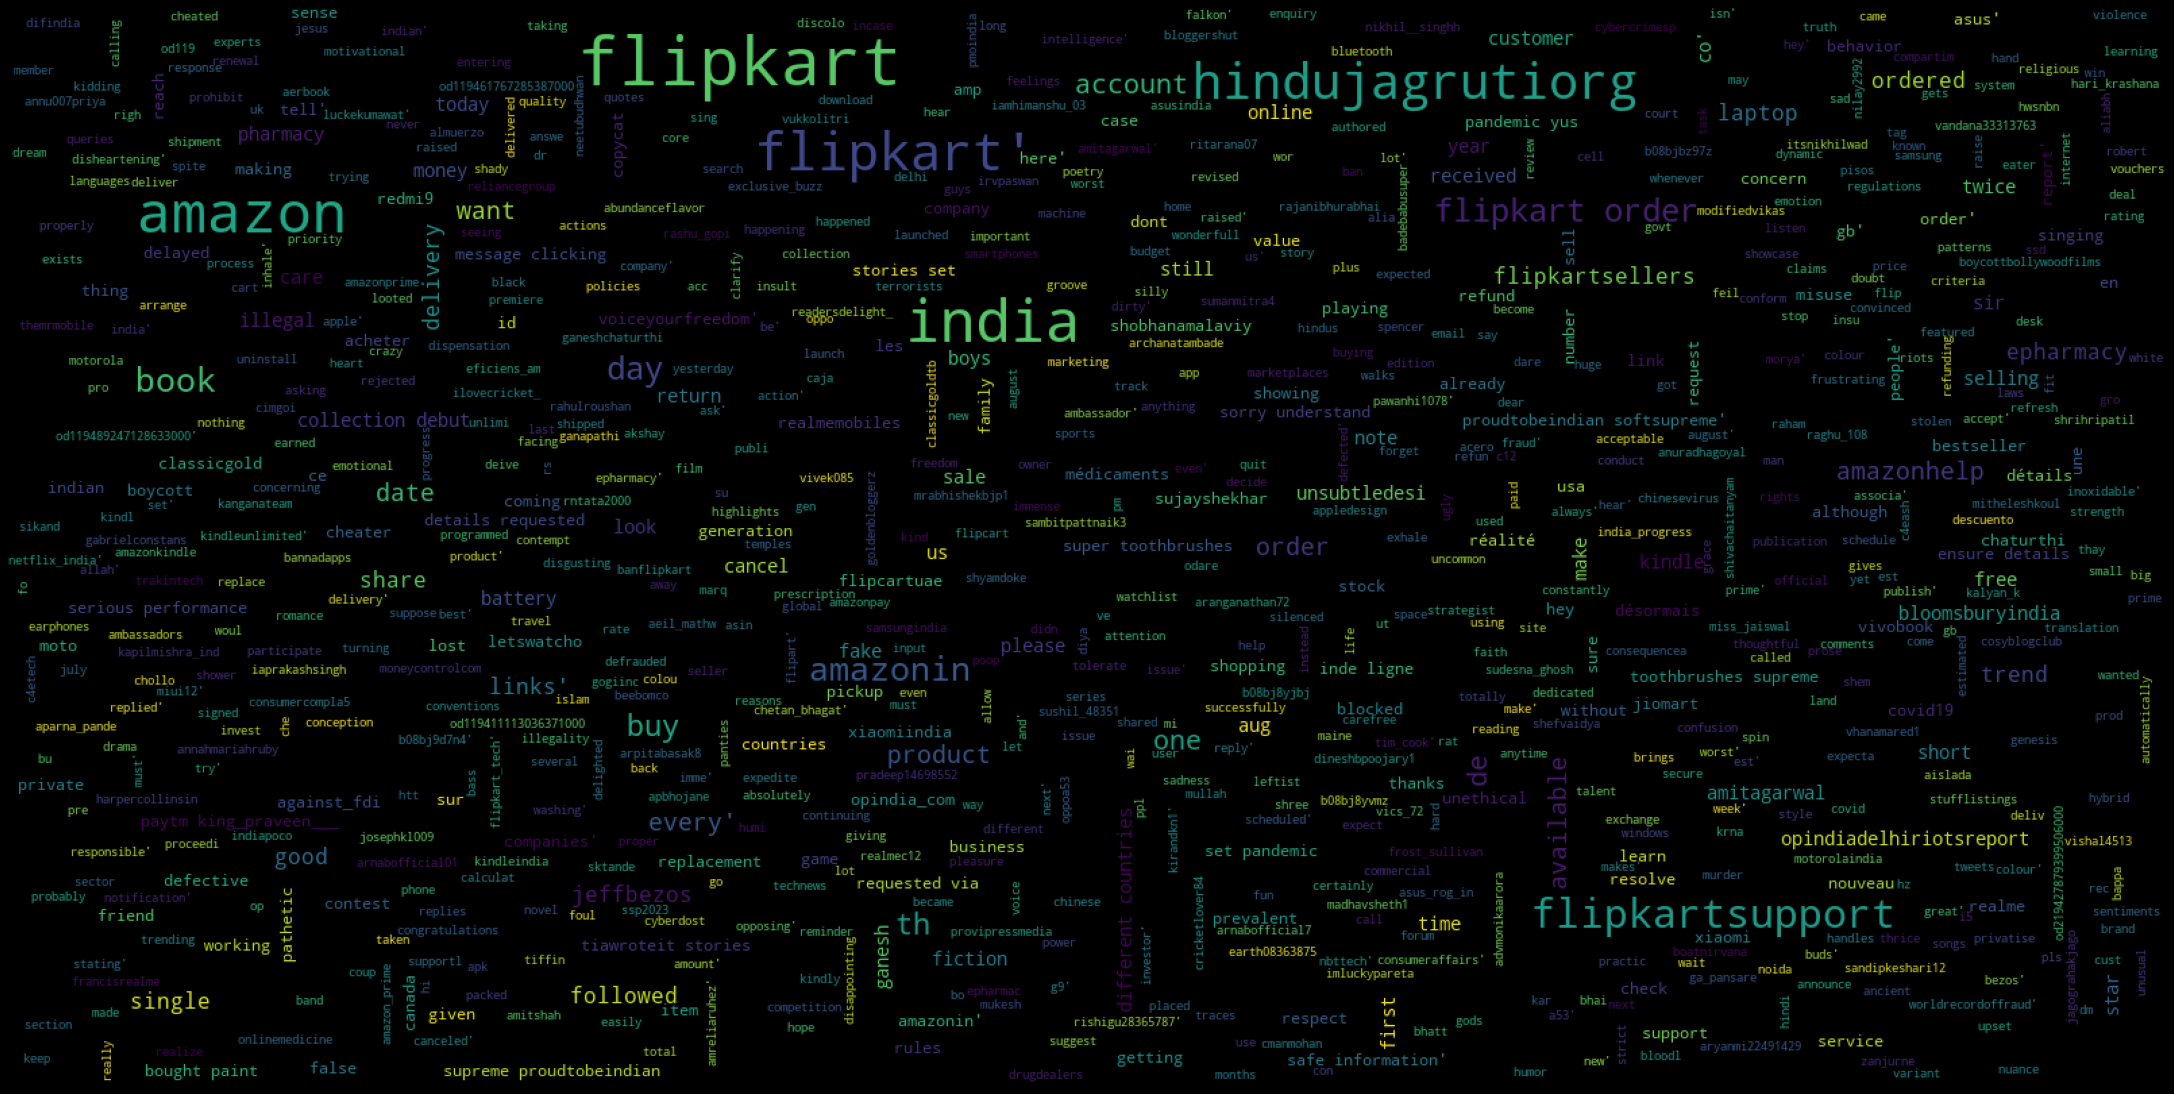

In [20]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
                          max_words=30000,
                          max_font_size=50, 
                          random_state=42,
                          width=1600, height=800
                         ).generate(str(wd_corpus))
print(wordcloud)
fig = plt.figure(figsize=(30, 15), facecolor='k')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()

# train random-forest with tfidf vectorizer for sentement analysis

In [21]:
label = {
        'positive': 1,
        'negative': -1,
        'neutral': 0
}
data['tweet_sentiment'] = data['tweet_sentiment'].apply(lambda a: label[a])
data

,tweet_txt,tweet_sentiment,preprocessed_tweet_txt,tokenized_tweet_txt
0,RT @ARanganathan72: Delighted to announce the ...,1,@aranganathan72: delighted announce publicatio...,"[aranganathan72, delighted, announce, publicat..."
1,RT @sudesna_ghosh: Free on #amazonprime 🇮🇳\n\n...,1,@sudesna_ghosh: free #amazonprime 🇮🇳 free #kin...,"[sudesna_ghosh, free, amazonprime, free, kindl..."
2,RT @ProviPressMedia: #Exclusive_Buzz :\n\nTher...,1,@provipressmedia: #exclusive_buzz : huge compe...,"[provipressmedia, exclusive_buzz, huge, compet..."
3,@JeffBezos We have been selling in Indian mark...,0,@jeffbezos selling indian marketplaces 5 years...,"[jeffbezos, selling, indian, marketplaces, yea..."
4,RT @GabrielConstans: THE LAST CONCEPTION #film...,0,@gabrielconstans: last conception #film showin...,"[gabrielconstans, last, conception, film, show..."
...,...,...,...,...
150,@_sujayshekhar @Flipkart @flipkartsupport @Fli...,-1,@_sujayshekhar @flipkart @flipkartsupport @fli...,"[sujayshekhar, flipkart, flipkartsupport, flip..."
151,@Flipkart no one came for Schedule pickup. voi...,0,@flipkart one came schedule pickup. voice supp...,"[flipkart, one, came, schedule, pickup, voice,..."
152,Again I have to wait 15 days for a single item...,-1,wait 15 days single item. thay also suppose te...,"[wait, days, single, item, thay, also, suppose..."
153,I had ordered one item through Flipkart on 9th...,1,ordered one item flipkart 9th august-2020 orde...,"[ordered, one, item, flipkart, th, august, ord..."


<AxesSubplot:xlabel='tweet_sentiment', ylabel='count'>

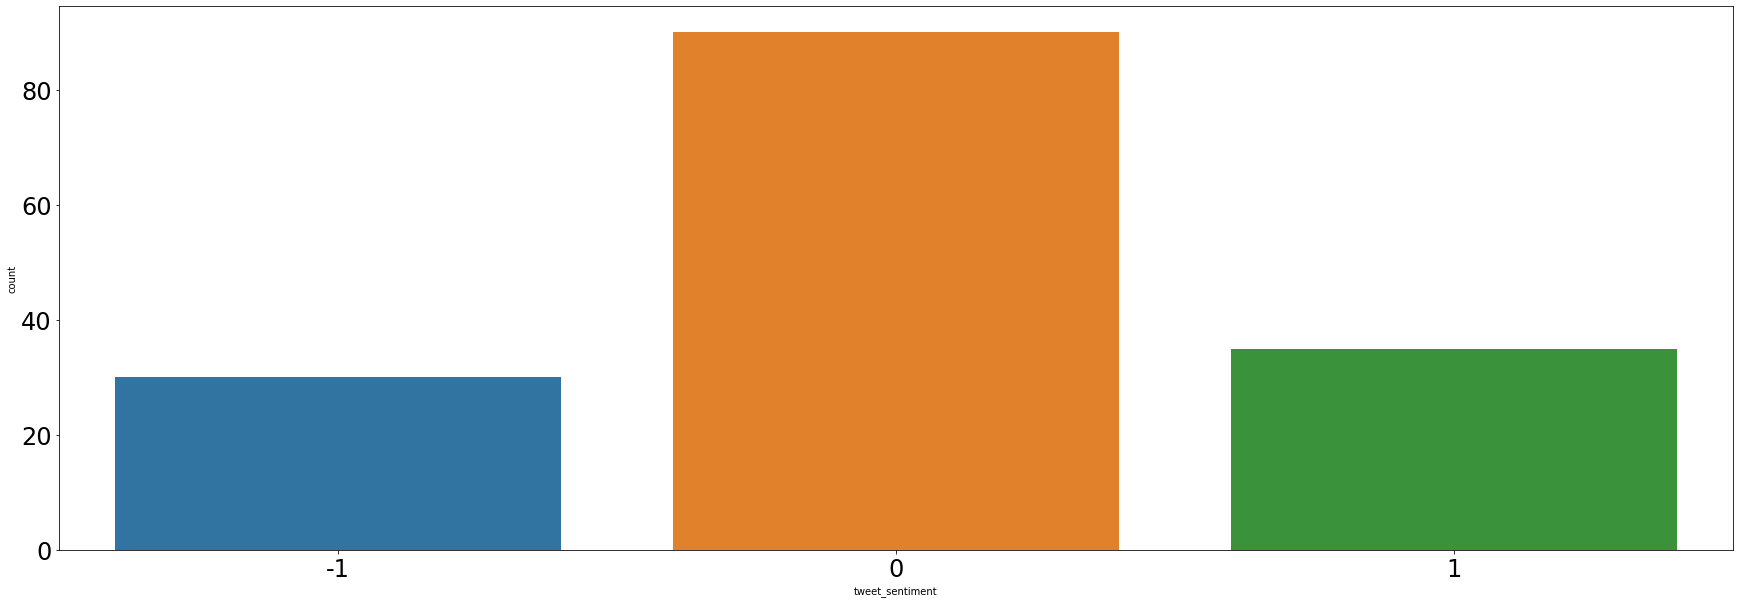

In [22]:
import seaborn as sns

# Distribution of the target variable
plt.figure(figsize=(30,10))
plt.xticks(fontsize=24, rotation=0)
plt.yticks(fontsize=24, rotation=0)
sns.countplot(data=data, x='tweet_sentiment')

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 2))
tfv.fit(list(data['preprocessed_tweet_txt']))
# pickle.dump(tfv, open('data/tfv.pickle', 'wb'))

TfidfVectorizer(ngram_range=(1, 2), sublinear_tf=True)

In [32]:
x = tfv.transform(data['preprocessed_tweet_txt'])
y = data['tweet_sentiment'].values

# tsne plot

In [33]:
from sklearn.manifold import TSNE
import numpy as np

def tsne_plot(x1, y1):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8,
                label='neutral')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8,
                label='positive')
    plt.scatter(X_t[np.where(y1 == -1), 0], X_t[np.where(y1 == -1), 1], marker='o', color='b', linewidth='1', alpha=0.8,
                label='negative')

    plt.legend(loc='best')
    plt.show()

In [36]:
# tsne_plot(x, y)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


train_x, val_x, train_y, val_y = train_test_split(x, y, test_size=0.25)

clf = RandomForestClassifier().fit(train_x, train_y)
# pickle.dump(clf, open('data/rf_tfidf.pickle', 'wb'))
pred_y = clf.predict(val_x)

print(classification_report(val_y, pred_y))
print(accuracy_score(val_y, pred_y))

              precision    recall  f1-score   support

          -1       1.00      0.11      0.20         9
           0       0.57      1.00      0.72        21
           1       1.00      0.11      0.20         9

    accuracy                           0.59        39
   macro avg       0.86      0.41      0.37        39
weighted avg       0.77      0.59      0.48        39

0.5897435897435898
